## TFM:Impacto de la calidad del aire en la salud de las personas en la ciudad de Madrid

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,MinMaxScaler,StandardScaler,RobustScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from xgboost import XGBRegressor

c:\Users\carlo\anaconda3\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [2]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [3]:
df=pd.read_excel('data/CMBD_6_20181217-135856.xlsx')

In [84]:
df_calidad_aire_07=pd.read_csv('data/datos07.csv',sep=';')
df_calidad_aire_08=pd.read_csv('data/datos08.csv',sep=';')
df_calidad_aire_09=pd.read_csv('data/datos09.csv',sep=';')
df_calidad_aire_10=pd.read_csv('data/datos10.csv',sep=';')
df_calidad_aire_11=pd.read_csv('data/datos11.csv',sep=';')
df_calidad_aire_12=pd.read_csv('data/datos12.csv',sep=';')
df_calidad_aire_13=pd.read_csv('data/datos13.csv',sep=';')
df_calidad_aire_14=pd.read_csv('data/datos14.csv',sep=';')
df_calidad_aire_15=pd.read_csv('data/datos15.csv',sep=';')
df_calidad_aire=pd.concat([df_calidad_aire_07, df_calidad_aire_08,df_calidad_aire_09,df_calidad_aire_10,df_calidad_aire_11,df_calidad_aire_12,df_calidad_aire_13,df_calidad_aire_14,df_calidad_aire_15],axis=0,ignore_index=True)

## Análisis exploratorio

In [5]:
df.head()

,Año,Hospital Recodificado,Comunidad Autónoma,Provincia,Grupo Hospital,Grupo Cluster,Historia Recodificada,CIP Recodificado,Fecha de nacimiento,Sexo,Provincia Residencia,Régimen Financiación,Fecha de ingreso,Tipo Ingreso,Fecha de alta,Tipo Alta,Estancia,Diagnóstico Principal,Diagnóstico 2,Diagnóstico 3,Diagnóstico 4,Diagnóstico 5,Diagnóstico 6,Diagnóstico 7,Diagnóstico 8,Diagnóstico 9,Diagnóstico 10,Diagnóstico 11,Diagnóstico 12,Diagnóstico 13,Diagnóstico 14,Fecha de Intervención,Procedimiento 1,Procedimiento 2,Procedimiento 3,Procedimiento 4,Procedimiento 5,Procedimiento 6,Procedimiento 7,Procedimiento 8,Procedimiento 9,Procedimiento 10,Procedimiento 11,Procedimiento 12,Procedimiento 13,Procedimiento 14,Procedimiento 15,Procedimiento 16,Procedimiento 17,Procedimiento 18,Procedimiento 19,Procedimiento 20,GDR AP,CDM AP,Tipo GDR AP,Valor Peso Español,GDR APR,CDM APR,Tipo GDR APR,Valor Peso Americano APR,Nivel Severidad,Nivel Mortalidad,Servicio,Edad,Reingreso,Coste
0,2013,-398345888794880068,13,28,4,4,-1687781257578748014,-320943158-171303395,10041944,1,28,1,30102013,1,13112013,1,14,428.0,NaN,276.1,276.8,491.20,494.0,041.85,518.83,401.9,427.31,553.3,V43.4,V15.82,V58.61,NaN,39.96,99.21,93.96,89.39,90.59,91.39,90.42,89.65,87.44,89.52,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,544,5,M,0.9181,194,5,M,1.0551,3,2,NML,69,1,4441.45
1,2013,-3959599681650518086,13,28,3,4,166370745435838543,648485069584850511,10061937,1,28,1,19032013,1,25032013,1,6,491.21,NaN,518.84,519.8,305.1,V15.05,V46.2,600.00,V60.3,V15.82,NaN,NaN,NaN,NaN,NaN,90.42,87.44,87.44,89.52,89.65,89.65,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,541,4,M,0.9407,140,4,M,0.9057,3,3,NML,75,0,4550.50
2,2013,-3959599681650518086,13,28,3,4,183632305468848809,899288196-1988273609,14111923,1,28,1,15112013,1,26112013,1,11,428.0,NaN,518.84,584.9,516.8,491.22,585.9,416.8,403.90,250.00,427.31,274.9,426.4,600.00,NaN,90.42,87.44,87.44,89.52,89.65,88.72,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,544,5,M,0.9181,194,5,M,2.2623,4,4,NML,90,0,4441.45
3,2013,-1468647043-245326524,13,28,4,5,2877111881585847151,-961279109-1723117644,10051956,2,28,1,28042013,1,14052013,1,16,428.1,NaN,428.20,518.81,491.20,305.1,416.8,276.2,424.2,414.10,NaN,NaN,NaN,NaN,NaN,88.72,87.44,89.37,89.17,89.52,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,544,5,M,0.9181,194,5,M,1.0551,3,4,NML,56,0,4441.45
4,2013,946141513-1168024764,13,28,3,3,17519509571482774643,-33451060035352825,7091928,1,28,1,7022013,2,8022013,1,1,162.5,NaN,496,173.9,600.90,414.8,414.01,250.00,272.0,401.9,V15.82,V45.81,V45.61,V10.83,NaN,33.26,33.24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,82,4,M,0.9844,136,4,M,0.8844,2,2,NML,84,0,4761.87


In [6]:
df.tail()

,Año,Hospital Recodificado,Comunidad Autónoma,Provincia,Grupo Hospital,Grupo Cluster,Historia Recodificada,CIP Recodificado,Fecha de nacimiento,Sexo,Provincia Residencia,Régimen Financiación,Fecha de ingreso,Tipo Ingreso,Fecha de alta,Tipo Alta,Estancia,Diagnóstico Principal,Diagnóstico 2,Diagnóstico 3,Diagnóstico 4,Diagnóstico 5,Diagnóstico 6,Diagnóstico 7,Diagnóstico 8,Diagnóstico 9,Diagnóstico 10,Diagnóstico 11,Diagnóstico 12,Diagnóstico 13,Diagnóstico 14,Fecha de Intervención,Procedimiento 1,Procedimiento 2,Procedimiento 3,Procedimiento 4,Procedimiento 5,Procedimiento 6,Procedimiento 7,Procedimiento 8,Procedimiento 9,Procedimiento 10,Procedimiento 11,Procedimiento 12,Procedimiento 13,Procedimiento 14,Procedimiento 15,Procedimiento 16,Procedimiento 17,Procedimiento 18,Procedimiento 19,Procedimiento 20,GDR AP,CDM AP,Tipo GDR AP,Valor Peso Español,GDR APR,CDM APR,Tipo GDR APR,Valor Peso Americano APR,Nivel Severidad,Nivel Mortalidad,Servicio,Edad,Reingreso,Coste
140932,2014,-397825696459335749,13,28,3,4,15732651961347031435,-148801774-1928770906,7111939,2,28,1,23112013,1,7012014,1,45,491.21,E878.1,519.8,518.84,511.9,786.30,276.1,276.7,415.12,038.9,996.61,250.00,401.9,V45.82,17122013.0,37.87,33.22,99.21,87.41,88.43,88.72,90.52,90.42,87.41,89.65,91.72,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,468,0,Q,2.1374,951,0,Q,5.3027,4,4,NML,74,1,9760.5
140933,2014,-3959599681650518086,13,28,3,4,1259742565-1684660259,-12521883511529773304,9011954,2,28,1,10122013,1,10022014,4,62,486,NaN,518.81,518.0,511.9,733.13,516.36,276.2,733.00,519.8,V10.11,V15.82,437.0,V46.2,6022014.0,77.49,81.65,33.24,90.42,91.32,88.93,90.52,87.44,33.26,88.01,87.41,89.52,88.72,31.42,18.11,99.23,87.24,93.9,93.18,NaN,539,4,Q,2.2499,951,0,Q,5.3027,4,3,NML,59,1,10274.5
140934,2014,6786010821767932736,13,28,2,3,82420401566747514,4927991441436875167,7101953,1,28,1,31102014,1,18112014,1,18,486,NaN,510.9,511.89,494.1,491.21,511.9,518.81,799.02,272.4,790.6,275.49,712.30,122.8,7112014.0,34.06,34.04,34.91,87.44,89.52,87.44,89.52,88.74,88.73,99.23,99.21,93.96,93.94,NaN,NaN,NaN,NaN,NaN,NaN,NaN,539,4,Q,2.2499,121,4,Q,2.6760,3,4,NML,61,0,10274.5
140935,2014,-398345888794880068,13,28,4,4,-1318909344-1737054105,2075399370-1949447169,19041951,1,28,1,3032014,1,15032014,4,12,481,NaN,518.81,995.91,491.21,511.9,276.2,584.9,518.89,573.8,285.9,305.1,303.91,V12.54,NaN,34.04,34.20,88.43,87.41,90.59,87.44,89.52,93.96,89.66,99.04,89.65,88.41,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,539,4,Q,2.2499,121,4,Q,2.6760,3,3,NML,62,0,10274.5
140936,2014,6785908421717601093,13,28,4,5,-758230369-639741394,-18336156992074847197,5111946,1,28,1,29012014,1,14022014,1,16,511.81,NaN,518.81,428.0,162.5,196.1,197.2,255.10,584.9,405.99,278.00,496,427.31,276.8,10022014.0,34.92,99.25,34.20,34.91,99.23,93.94,93.96,89.65,88.72,91.39,90.59,89.52,87.44,99.19,99.29,90.49,NaN,NaN,NaN,NaN,539,4,Q,2.2499,951,0,Q,5.3027,4,4,NML,67,1,10274.5


In [7]:
df.columns=df.columns.str.strip().str.lower().str.replace(' ','_')

In [8]:
df.año.sort_values().unique()

array([2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015], dtype=int64)

In [9]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
año,140937.0,NaN,NaN,NaN,2011.504729,2.248531,2008.0,2010.0,2012.0,2013.0,2015.0
hospital_recodificado,140937,34,-398345888794880068,16385,NaN,NaN,NaN,NaN,NaN,NaN,NaN
comunidad_autónoma,140937.0,NaN,NaN,NaN,13.0,0.0,13.0,13.0,13.0,13.0,13.0
provincia,140937.0,NaN,NaN,NaN,28.0,0.0,28.0,28.0,28.0,28.0,28.0
grupo_hospital,140937.0,NaN,NaN,NaN,3.069386,0.963666,1.0,2.0,3.0,4.0,4.0
grupo_cluster,140937.0,NaN,NaN,NaN,8.712382,20.757274,1.0,3.0,4.0,5.0,99.0
historia_recodificada,140937,92349,-411355015-1824388255,47,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cip_recodificado,140937,78266,00,21565,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fecha_de_nacimiento,140937.0,NaN,NaN,NaN,15501138.005173,8826430.697751,1011900.0,8041947.0,15101947.0,23071940.0,31122013.0
sexo,140937.0,NaN,NaN,NaN,1.38564,0.486806,1.0,1.0,1.0,2.0,3.0


In [10]:
comunidad_autonoma=13
provincia=28

In [11]:
df.drop(['comunidad_autónoma','provincia'],axis=1,inplace=True)

In [12]:
df_calidad_aire_08.head()

,PROVINCIA,MUNICIPIO,ESTACION,MAGNITUD,PUNTO_MUESTREO,ANO,MES,D01,V01,D02,V02,D03,V03,D04,V04,D05,V05,D06,V06,D07,V07,D08,V08,D09,V09,D10,V10,D11,V11,D12,V12,D13,V13,D14,V14,D15,V15,D16,V16,D17,V17,D18,V18,D19,V19,D20,V20,D21,V21,D22,V22,D23,V23,D24,V24,D25,V25,D26,V26,D27,V27,D28,V28,D29,V29,D30,V30,D31,V31
0,28,79,4,1,28079004_1_38,2008,1,20.0,V,20.0,V,14.0,V,17.0,V,16.0,V,11.0,V,15.0,V,20.0,V,17.0,V,15.0,V,12.0,V,15.0,V,16.0,V,13.0,V,12.0,V,12.0,V,14.0,V,20.0,V,27.0,V,23.0,V,27.0,V,29.0,V,29.0,V,26.0,V,20.0,V,18.0,V,24.0,V,30.0,V,24.0,V,27.0,V,20.0,V
1,28,79,4,1,28079004_1_38,2008,2,23.0,V,16.0,V,13.0,V,12.0,V,19.0,V,25.0,V,25.0,V,24.0,V,20.0,V,21.0,V,22.0,V,16.0,V,15.0,V,20.0,V,20.0,V,17.0,V,12.0,V,17.0,V,14.0,V,17.0,V,16.0,V,15.0,V,14.0,V,13.0,V,16.0,V,19.0,V,20.0,V,14.0,V,17.0,V,0.0,N,0.0,N
2,28,79,4,1,28079004_1_38,2008,3,17.0,V,16.0,V,15.0,V,12.0,V,12.0,V,16.0,V,19.0,V,17.0,V,17.0,V,11.0,V,15.0,V,13.0,V,15.0,V,19.0,V,13.0,V,10.0,V,13.0,V,11.0,V,13.0,V,11.0,V,13.0,V,11.0,V,12.0,V,14.0,V,15.0,V,13.0,V,11.0,V,14.0,V,13.0,V,11.0,V,11.0,V
3,28,79,4,1,28079004_1_38,2008,4,14.0,V,11.0,V,10.0,V,9.0,V,9.0,V,11.0,V,9.0,V,8.0,V,8.0,V,8.0,V,11.0,V,11.0,V,9.0,V,10.0,V,11.0,V,10.0,V,7.0,V,7.0,V,7.0,V,7.0,V,8.0,V,9.0,V,9.0,V,9.0,V,9.0,V,9.0,V,9.0,V,7.0,V,6.0,V,7.0,V,0.0,N
4,28,79,4,1,28079004_1_38,2008,5,7.0,V,8.0,V,8.0,V,8.0,V,7.0,V,8.0,V,7.0,V,6.0,V,7.0,V,6.0,V,6.0,V,7.0,V,7.0,V,6.0,V,6.0,V,6.0,V,7.0,V,7.0,V,8.0,V,8.0,V,8.0,V,7.0,V,6.0,V,6.0,V,7.0,V,7.0,V,7.0,V,7.0,V,7.0,V,7.0,V,7.0,V


In [13]:
df.dtypes

año                           int64
hospital_recodificado        object
grupo_hospital                int64
grupo_cluster                 int64
historia_recodificada        object
cip_recodificado             object
fecha_de_nacimiento           int64
sexo                          int64
provincia_residencia          int64
régimen_financiación          int64
fecha_de_ingreso              int64
tipo_ingreso                  int64
fecha_de_alta                 int64
tipo_alta                     int64
estancia                      int64
diagnóstico_principal        object
diagnóstico_2                object
diagnóstico_3                object
diagnóstico_4                object
diagnóstico_5                object
diagnóstico_6                object
diagnóstico_7                object
diagnóstico_8                object
diagnóstico_9                object
diagnóstico_10               object
diagnóstico_11               object
diagnóstico_12               object
diagnóstico_13              

In [14]:
df_calidad_aire_08.dtypes

PROVINCIA           int64
MUNICIPIO           int64
ESTACION            int64
MAGNITUD            int64
PUNTO_MUESTREO     object
ANO                 int64
MES                 int64
D01               float64
V01                object
D02               float64
V02                object
D03               float64
V03                object
D04               float64
V04                object
D05               float64
V05                object
D06               float64
V06                object
D07               float64
V07                object
D08               float64
V08                object
D09               float64
V09                object
D10               float64
V10                object
D11               float64
V11                object
D12               float64
V12                object
D13               float64
V13                object
D14               float64
V14                object
D15               float64
V15                object
D16               float64
V16         

In [15]:
df.shape

(140937, 64)

In [16]:
df_calidad_aire_08.shape

(972, 69)

In [17]:
df_calidad_aire_09.shape

(1049, 69)

In [18]:
df_calidad_aire_10.shape

(1808, 69)

In [19]:
df_calidad_aire_11.shape

(1848, 69)

In [20]:
df_calidad_aire_12.shape

(1830, 69)

In [21]:
df_calidad_aire_13.shape

(1812, 69)

In [22]:
df_calidad_aire_14.shape

(1805, 69)

In [23]:
df_calidad_aire_15.shape

(1812, 69)

In [24]:
df.isnull().mean().sort_values(ascending=False)*100

procedimiento_20            98.493653
procedimiento_19            98.027487
procedimiento_18            97.618085
procedimiento_17            97.168948
procedimiento_16            96.522560
procedimiento_13            96.469344
fecha_de_intervención       96.453735
procedimiento_15            95.697368
procedimiento_14            94.765037
procedimiento_12            94.573462
procedimiento_11            91.243605
procedimiento_10            90.077836
diagnóstico_14              83.547968
procedimiento_9             82.902290
diagnóstico_13              74.983858
procedimiento_8             74.409133
diagnóstico_2               70.656393
diagnóstico_12              68.644856
procedimiento_7             63.918630
diagnóstico_11              61.889355
diagnóstico_10              54.752833
procedimiento_6             53.680013
diagnóstico_9               46.976309
procedimiento_5             42.874476
diagnóstico_8               38.771224
procedimiento_4             32.650759
diagnóstico_

In [25]:
df.duplicated().sum()

0

In [26]:
df.select_dtypes('object').apply(pd.Series.nunique, axis = 0).sort_values()

servicio                     2
tipo_gdr_ap                  3
tipo_gdr_apr                 3
hospital_recodificado       34
procedimiento_10           313
procedimiento_9            365
procedimiento_8            406
procedimiento_7            439
procedimiento_6            479
procedimiento_4            532
procedimiento_5            536
procedimiento_3            573
procedimiento_2            658
procedimiento_1            758
diagnóstico_2             1603
diagnóstico_14            1628
diagnóstico_principal     1714
diagnóstico_13            1955
diagnóstico_12            2134
diagnóstico_11            2315
diagnóstico_10            2452
diagnóstico_9             2709
diagnóstico_3             2749
diagnóstico_8             2817
diagnóstico_7             2934
diagnóstico_4             2957
diagnóstico_6             3013
diagnóstico_5             3088
cip_recodificado         78266
historia_recodificada    92349
dtype: int64

In [27]:
def vuelta_fecha(x):
    x=str(x)
    if len(x)==8:
        año=x[4:]
        mes=x[2:4]
        dia=x[:2]
        fecha=año+'-'+mes+'-'+dia
    else:
        año=x[3:]
        mes=x[1:3]
        dia=x[:1]
        fecha=año+'-'+mes+'-'+'0'+dia
    return pd.to_datetime(fecha,format='%Y-%m-%d')

In [28]:
df[['fecha_de_alta','fecha_de_nacimiento','fecha_de_ingreso']]=df[['fecha_de_alta','fecha_de_nacimiento','fecha_de_ingreso']].applymap(lambda x:vuelta_fecha(x))

In [29]:
df.servicio=LabelEncoder().fit_transform(df.servicio)

In [30]:
df.corr()

,año,grupo_hospital,grupo_cluster,sexo,provincia_residencia,régimen_financiación,tipo_ingreso,tipo_alta,estancia,fecha_de_intervención,procedimiento_11,procedimiento_12,procedimiento_13,procedimiento_14,procedimiento_15,procedimiento_16,procedimiento_17,procedimiento_18,procedimiento_19,procedimiento_20,gdr_ap,cdm_ap,valor_peso_español,gdr_apr,cdm_apr,valor_peso_americano_apr,nivel_severidad,nivel_mortalidad,servicio,edad,reingreso,coste
año,1.000000,0.019363,-0.005819,0.036342,-1.234734e-02,-0.001493,-0.058603,0.005646,-0.030515,0.006578,-0.105107,-0.028956,-0.100526,-0.164331,-0.208958,-0.209612,-0.221553,-0.217502,-0.177432,-0.158896,0.039462,0.033923,-0.022892,0.026924,2.244747e-02,-0.028704,0.050871,0.092187,0.007022,0.040849,0.041591,0.010191
grupo_hospital,0.019363,1.000000,-0.301435,0.015969,-4.905967e-02,-0.068808,0.038454,0.016891,-0.011666,0.002978,0.035966,0.119615,0.110954,0.112506,0.095499,0.100162,0.066776,0.004459,-0.040507,-0.085293,-0.036817,-0.036807,0.021226,-0.032885,-3.653476e-02,0.035038,0.007164,0.033220,-0.058478,0.133830,0.023672,0.021125
grupo_cluster,-0.005819,-0.301435,1.000000,-0.009408,-4.079736e-03,0.081044,0.184258,-0.001630,-0.000623,0.011092,-0.125887,-0.287455,-0.192254,-0.112981,-0.061638,-0.030144,0.017670,0.095915,0.126068,0.161556,-0.072942,0.095690,-0.038671,0.089833,9.433495e-02,-0.052906,-0.123101,-0.104351,-0.011233,-0.024309,-0.025546,-0.038238
sexo,0.036342,0.015969,-0.009408,1.000000,-8.871797e-04,0.003291,-0.021956,-0.009044,-0.009876,0.012917,0.001096,0.035011,0.020052,0.003072,0.006616,0.018494,-0.011996,0.001127,0.017037,0.036712,-0.037175,0.029107,-0.020847,0.028366,3.155240e-02,-0.032427,-0.045065,-0.056508,-0.060256,-0.032449,-0.056661,-0.019226
provincia_residencia,-0.012347,-0.049060,-0.004080,-0.000887,1.000000e+00,0.022056,-0.015675,-0.000375,0.000313,-0.003388,-0.000835,-0.040026,0.013953,-0.003456,-0.005750,-0.004183,-0.014471,0.025382,0.032629,0.036511,-0.003343,-0.001440,0.001664,-0.002061,9.329766e-07,-0.007404,-0.002409,-0.003226,0.003911,0.015848,-0.004796,-0.000938
régimen_financiación,-0.001493,-0.068808,0.081044,0.003291,2.205576e-02,1.000000,-0.000430,0.010987,0.009893,-0.004505,-0.018531,-0.040319,0.004192,-0.030685,-0.024870,-0.020869,-0.002551,0.026379,0.015064,0.030471,-0.005058,0.005116,0.011053,0.004859,3.551820e-03,0.010742,-0.009307,-0.013302,-0.000706,-0.024833,-0.005496,0.011479
tipo_ingreso,-0.058603,0.038454,0.184258,-0.021956,-1.567461e-02,-0.000430,1.000000,-0.055261,-0.176316,0.052696,-0.046479,-0.107645,-0.042172,-0.056427,-0.046346,-0.049428,-0.016421,0.014175,0.033048,0.075858,-0.224796,0.031898,-0.077084,0.036676,2.874088e-02,-0.111191,-0.329493,-0.299530,-0.023057,-0.132447,-0.035921,-0.076619
tipo_alta,0.005646,0.016891,-0.001630,-0.009044,-3.749949e-04,0.010987,-0.055261,1.000000,0.124386,-0.020074,-0.025353,-0.018564,-0.008937,-0.018097,-0.032264,-0.033070,0.006807,-0.060908,0.028084,-0.036905,0.089880,0.026877,0.080082,0.030302,2.514118e-02,0.132177,0.138261,0.159593,0.015794,0.110591,0.074394,0.079083
estancia,-0.030515,-0.011666,-0.000623,-0.009876,3.130452e-04,0.009893,-0.176316,0.124386,1.000000,0.001639,-0.101951,-0.052130,-0.089891,-0.079313,-0.111804,-0.154641,-0.084788,-0.122413,-0.049988,-0.015590,0.253979,-0.032888,0.532703,0.003686,-2.384552e-02,0.545374,0.312185,0.272019,0.027488,0.118842,0.074027,0.527187
fecha_de_intervención,0.006578,0.002978,0.011092,0.012917,-3.387717e-03,-0.004505,0.052696,-0.020074,0.001639,1.000000,-0.038284,-0.041814,-0.042602,-0.043771,-0.017567,-0.025032,0.040526,-0.006393,-0.008184,0.059316,0.007725,-0.011922,0.014758,-0.010060,-2.121267e-03,0.002699,-0.011590,0.001371,-0.000248,-0.008170,0.012741,0.014243


In [31]:
df.select_dtypes('number').describe()

,año,grupo_hospital,grupo_cluster,sexo,provincia_residencia,régimen_financiación,tipo_ingreso,tipo_alta,estancia,fecha_de_intervención,procedimiento_11,procedimiento_12,procedimiento_13,procedimiento_14,procedimiento_15,procedimiento_16,procedimiento_17,procedimiento_18,procedimiento_19,procedimiento_20,gdr_ap,cdm_ap,valor_peso_español,gdr_apr,cdm_apr,valor_peso_americano_apr,nivel_severidad,nivel_mortalidad,servicio,edad,reingreso,coste
count,140937.000000,140937.000000,140937.000000,140937.000000,140937.000000,140937.000000,140937.000000,140937.000000,140937.000000,4.998000e+03,12341.000000,7648.000000,4976.000000,7378.000000,6064.000000,4901.000000,3990.000000,3357.000000,2780.000000,2123.000000,140937.000000,140937.000000,140937.000000,140937.000000,140937.000000,140937.000000,140937.000000,140937.000000,140937.000000,140937.000000,140937.000000,140937.000000
mean,2011.504729,3.069386,8.712382,1.385640,28.295345,1.108190,1.229322,1.148045,8.233792,1.601155e+07,89.994133,88.978576,89.173368,90.813866,90.658287,90.871745,90.641140,90.146235,90.557446,91.138337,339.322477,4.462391,0.927574,165.432335,4.482379,1.020586,2.408303,2.166997,0.990265,66.232373,0.129136,4326.082895
std,2.248531,0.963666,20.757274,0.486806,5.048316,0.773977,0.505773,0.709761,10.094767,8.673040e+06,11.674164,13.366136,12.870377,9.212901,9.544991,9.400413,9.454177,9.762235,8.079143,7.419758,240.095403,2.991342,1.166974,128.710834,2.995818,0.947053,0.891282,0.967887,0.098184,17.506537,0.335351,5533.796695
min,2008.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.012013e+06,0.120000,0.140000,0.120000,0.140000,0.140000,0.140000,0.140000,0.140000,0.140000,0.140000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2010.000000,2.000000,3.000000,1.000000,28.000000,1.000000,1.000000,1.000000,3.000000,9.022010e+06,89.390000,88.927500,89.370000,89.170000,89.370000,89.520000,89.520000,89.370000,89.370000,89.520000,88.000000,4.000000,0.634600,136.000000,4.000000,0.607200,2.000000,1.000000,1.000000,57.000000,0.000000,3020.730000
50%,2012.000000,3.000000,4.000000,1.000000,28.000000,1.000000,1.000000,1.000000,6.000000,1.608201e+07,90.490000,90.420000,90.460000,90.410000,90.310000,90.490000,90.420000,90.410000,90.410000,90.590000,539.000000,4.000000,0.830500,140.000000,4.000000,0.905700,3.000000,2.000000,1.000000,70.000000,0.000000,4040.280000
75%,2013.000000,4.000000,5.000000,2.000000,28.000000,1.000000,1.000000,1.000000,10.000000,2.311201e+07,93.960000,93.940000,93.940000,93.960000,93.960000,93.960000,93.940000,92.180000,92.140000,93.940000,541.000000,4.000000,0.949800,141.000000,4.000000,1.047400,3.000000,3.000000,1.000000,79.000000,0.000000,4584.570000
max,2015.000000,4.000000,99.000000,3.000000,99.000000,9.000000,9.000000,9.000000,623.000000,3.112201e+07,99.840000,99.990000,99.910000,99.990000,99.840000,99.940000,99.840000,99.840000,99.840000,99.840000,901.000000,25.000000,23.036400,956.000000,25.000000,17.419400,4.000000,4.000000,1.000000,110.000000,1.000000,116051.540000


In [32]:
df.grupo_hospital.value_counts(dropna=False)

4    60908
3    38661
2    31607
1     9761
Name: grupo_hospital, dtype: int64

In [33]:
df.grupo_cluster.value_counts(dropna=False)

4     46866
5     41405
3     26713
2      7183
99     7056
1      5985
6      5729
Name: grupo_cluster, dtype: int64

In [34]:
df.provincia_residencia.value_counts(dropna=False)

28    137962
99       585
45       359
53       195
19       189
13       170
40       108
10       103
5         91
16        87
6         86
11        68
30        60
24        57
35        56
47        49
50        48
38        46
3         45
18        40
33        33
8         30
2         29
7         28
9         28
37        25
29        24
41        24
36        23
14        23
27        21
46        19
15        19
42        19
4         19
49        18
23        18
39        16
34        15
48        13
51        12
31        12
20        11
32        10
26        10
21         8
12         6
1          5
44         5
17         3
43         3
52         2
22         1
25         1
Name: provincia_residencia, dtype: int64

In [35]:
df.régimen_financiación.value_counts(dropna=False)

1    137449
3      1518
6       978
9       659
8       252
5        43
4        38
Name: régimen_financiación, dtype: int64

In [36]:
df.tipo_ingreso.value_counts(dropna=False)

1    110010
2     30728
9       199
Name: tipo_ingreso, dtype: int64

In [37]:
df.tipo_alta.value_counts(dropna=False)

1    133930
4      4824
2       875
5       557
3       453
9       298
Name: tipo_alta, dtype: int64

<AxesSubplot:xlabel='edad', ylabel='estancia'>

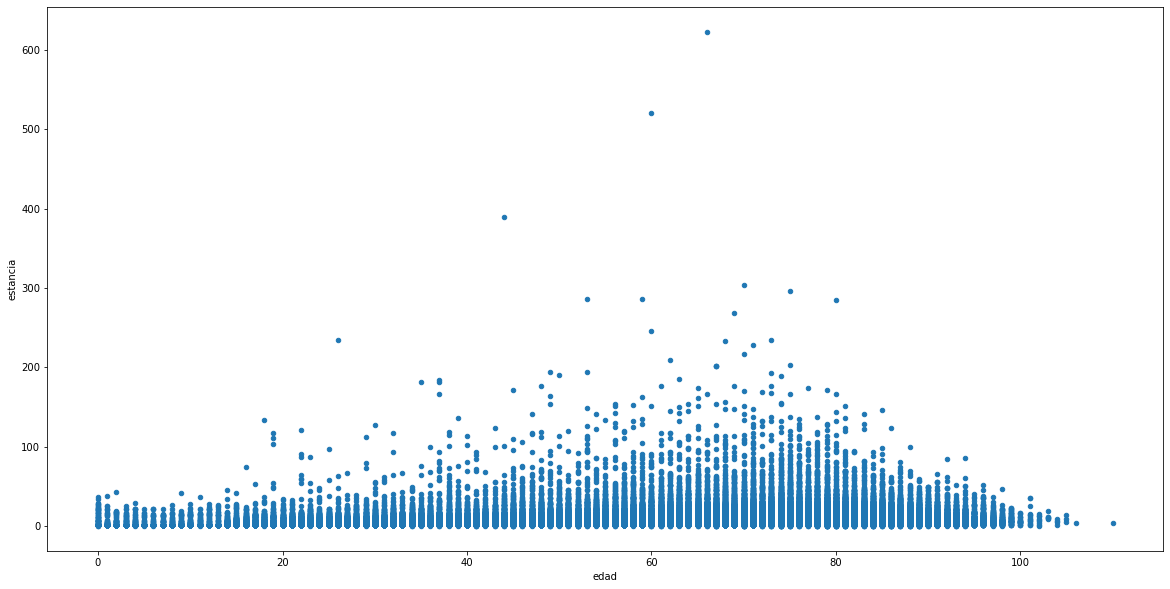

In [38]:
df.plot(x='edad',y='estancia',kind='scatter',figsize=(20,10))

In [39]:
df.corr()['edad'].sort_values(ascending=False)

edad                        1.000000
nivel_mortalidad            0.415884
nivel_severidad             0.328792
grupo_hospital              0.133830
gdr_ap                      0.120839
estancia                    0.118842
tipo_alta                   0.110591
valor_peso_americano_apr    0.087202
reingreso                   0.086420
servicio                    0.081427
procedimiento_17            0.053349
año                         0.040849
procedimiento_18            0.037230
procedimiento_16            0.032834
valor_peso_español          0.032685
coste                       0.032284
procedimiento_13            0.028031
procedimiento_11            0.024907
procedimiento_14            0.017342
procedimiento_15            0.016560
procedimiento_19            0.016062
provincia_residencia        0.015848
procedimiento_12            0.008433
fecha_de_intervención      -0.008170
procedimiento_20           -0.016498
grupo_cluster              -0.024309
régimen_financiación       -0.024833
s

In [40]:
df.corr()['estancia'].sort_values(ascending=False)

estancia                    1.000000
valor_peso_americano_apr    0.545374
valor_peso_español          0.532703
coste                       0.527187
nivel_severidad             0.312185
nivel_mortalidad            0.272019
gdr_ap                      0.253979
tipo_alta                   0.124386
edad                        0.118842
reingreso                   0.074027
servicio                    0.027488
régimen_financiación        0.009893
gdr_apr                     0.003686
fecha_de_intervención       0.001639
provincia_residencia        0.000313
grupo_cluster              -0.000623
sexo                       -0.009876
grupo_hospital             -0.011666
procedimiento_20           -0.015590
cdm_apr                    -0.023846
año                        -0.030515
cdm_ap                     -0.032888
procedimiento_19           -0.049988
procedimiento_12           -0.052130
procedimiento_14           -0.079313
procedimiento_17           -0.084788
procedimiento_13           -0.089891
p

In [41]:
df.corr()['gdr_ap'].sort_values(ascending=False)

gdr_ap                      1.000000
nivel_severidad             0.676978
nivel_mortalidad            0.646712
valor_peso_americano_apr    0.399210
valor_peso_español          0.332888
coste                       0.328598
estancia                    0.253979
cdm_ap                      0.159002
gdr_apr                     0.155731
cdm_apr                     0.153813
edad                        0.120839
tipo_alta                   0.089880
reingreso                   0.083190
año                         0.039462
fecha_de_intervención       0.007725
provincia_residencia       -0.003343
servicio                   -0.005026
régimen_financiación       -0.005058
procedimiento_12           -0.006233
grupo_hospital             -0.036817
sexo                       -0.037175
procedimiento_13           -0.055188
procedimiento_11           -0.056459
procedimiento_14           -0.060891
procedimiento_20           -0.063929
procedimiento_19           -0.069898
grupo_cluster              -0.072942
p

In [42]:
df.corr()['cdm_ap'].sort_values(ascending=False)

cdm_ap                      1.000000
cdm_apr                     0.943886
gdr_apr                     0.838653
gdr_ap                      0.159002
grupo_cluster               0.095690
procedimiento_20            0.048702
procedimiento_13            0.038138
año                         0.033923
tipo_ingreso                0.031898
reingreso                   0.031337
sexo                        0.029107
tipo_alta                   0.026877
procedimiento_16            0.021965
procedimiento_14            0.018251
nivel_severidad             0.016366
procedimiento_11            0.016093
procedimiento_12            0.014919
nivel_mortalidad            0.012188
procedimiento_15            0.005761
régimen_financiación        0.005116
procedimiento_18            0.003478
procedimiento_17           -0.000219
provincia_residencia       -0.001440
procedimiento_19           -0.002280
fecha_de_intervención      -0.011922
valor_peso_americano_apr   -0.023994
estancia                   -0.032888
g

In [43]:
df.corr()['coste'].sort_values(ascending=False)			

coste                       1.000000
valor_peso_español          0.996378
valor_peso_americano_apr    0.800385
estancia                    0.527187
gdr_ap                      0.328598
nivel_severidad             0.240144
nivel_mortalidad            0.215871
tipo_alta                   0.079083
edad                        0.032284
servicio                    0.027178
grupo_hospital              0.021125
reingreso                   0.016368
fecha_de_intervención       0.014243
régimen_financiación        0.011479
año                         0.010191
gdr_apr                     0.002322
provincia_residencia       -0.000938
sexo                       -0.019226
grupo_cluster              -0.038238
cdm_apr                    -0.041377
cdm_ap                     -0.056967
tipo_ingreso               -0.076619
procedimiento_12           -0.079736
procedimiento_13           -0.095565
procedimiento_19           -0.107013
procedimiento_17           -0.107273
procedimiento_14           -0.108115
p

In [44]:
df.corr()['valor_peso_español'].sort_values(ascending=False)

valor_peso_español          1.000000
coste                       0.996378
valor_peso_americano_apr    0.804885
estancia                    0.532703
gdr_ap                      0.332888
nivel_severidad             0.242389
nivel_mortalidad            0.216155
tipo_alta                   0.080082
edad                        0.032685
servicio                    0.027724
grupo_hospital              0.021226
reingreso                   0.015405
fecha_de_intervención       0.014758
régimen_financiación        0.011053
provincia_residencia        0.001664
gdr_apr                     0.001554
sexo                       -0.020847
año                        -0.022892
grupo_cluster              -0.038671
cdm_apr                    -0.042143
cdm_ap                     -0.058313
procedimiento_12           -0.075800
tipo_ingreso               -0.077084
procedimiento_13           -0.090691
procedimiento_19           -0.098724
procedimiento_17           -0.101713
procedimiento_14           -0.104873
p

In [45]:
df.corr()['gdr_apr'].sort_values(ascending=False)

gdr_apr                     1.000000
cdm_apr                     0.884498
cdm_ap                      0.838653
gdr_ap                      0.155731
grupo_cluster               0.089833
procedimiento_20            0.040166
tipo_ingreso                0.036676
valor_peso_americano_apr    0.036086
tipo_alta                   0.030302
reingreso                   0.030087
sexo                        0.028366
año                         0.026924
nivel_severidad             0.012775
régimen_financiación        0.004859
procedimiento_14            0.004357
nivel_mortalidad            0.003766
estancia                    0.003686
coste                       0.002322
valor_peso_español          0.001554
procedimiento_16            0.000629
provincia_residencia       -0.002061
fecha_de_intervención      -0.010060
procedimiento_19           -0.011324
procedimiento_12           -0.019294
procedimiento_11           -0.027432
procedimiento_13           -0.029466
procedimiento_17           -0.032651
g

In [46]:
df.corr()['cdm_apr'].sort_values(ascending=False)

cdm_apr                     1.000000e+00
cdm_ap                      9.438860e-01
gdr_apr                     8.844981e-01
gdr_ap                      1.538129e-01
grupo_cluster               9.433495e-02
procedimiento_20            5.563300e-02
procedimiento_13            3.703523e-02
sexo                        3.155240e-02
tipo_ingreso                2.874088e-02
reingreso                   2.821290e-02
procedimiento_14            2.751933e-02
tipo_alta                   2.514118e-02
año                         2.244747e-02
procedimiento_16            2.200174e-02
nivel_severidad             2.134250e-02
procedimiento_12            1.402871e-02
nivel_mortalidad            1.201913e-02
procedimiento_11            1.003095e-02
procedimiento_15            7.388848e-03
procedimiento_18            5.887476e-03
régimen_financiación        3.551820e-03
provincia_residencia        9.329766e-07
fecha_de_intervención      -2.121267e-03
procedimiento_17           -3.762648e-03
procedimiento_19

In [47]:
df['ingreso_mes_año']=df.fecha_de_ingreso.dt.strftime('%m-%Y')

<AxesSubplot:xlabel='ingreso_mes_año'>

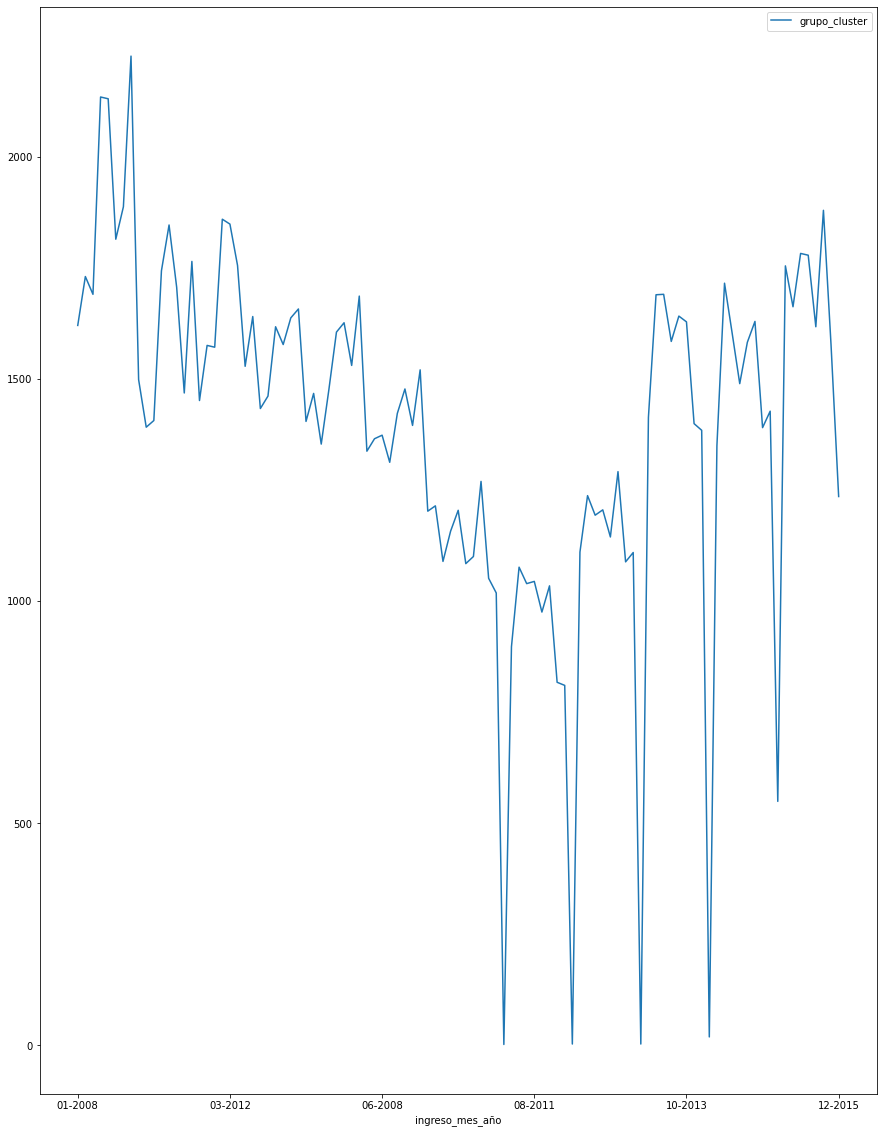

In [48]:
df.groupby('ingreso_mes_año').count().reset_index().plot(x='ingreso_mes_año',y='grupo_cluster',kind='line',figsize=(15,20))

In [49]:
features=['grupo_cluster','sexo','fecha_de_ingreso','tipo_ingreso','estancia','diagnóstico_principal','procedimiento_1','gdr_ap','cdm_ap','tipo_gdr_ap','valor_peso_español','gdr_apr',	'cdm_apr','tipo_gdr_apr','nivel_severidad',	'nivel_mortalidad',	'servicio','edad','reingreso']

In [50]:
len(features)

19

In [51]:
df.groupby('grupo_cluster')['edad'].mean()

grupo_cluster
1     64.916124
2     66.808297
3     64.899749
4     69.350830
5     66.372129
6     48.599057
99    64.591837
Name: edad, dtype: float64

<AxesSubplot:title={'center':'edad'}, xlabel='[grupo_cluster]'>

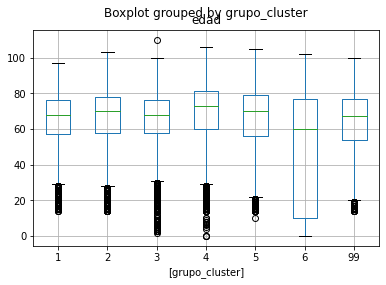

In [52]:
df[['grupo_cluster','edad']].boxplot(by='grupo_cluster')

In [53]:
df.ingreso_mes_año.value_counts()

01-2015    2226
01-2011    2134
01-2012    2130
01-2014    1887
12-2013    1879
03-2011    1859
03-2012    1848
02-2012    1846
01-2013    1814
12-2010    1782
12-2011    1778
02-2015    1764
03-2013    1755
12-2008    1754
02-2011    1743
01-2009    1730
11-2009    1715
02-2013    1706
01-2010    1690
10-2010    1690
10-2009    1689
05-2013    1686
12-2009    1662
04-2013    1657
10-2012    1641
03-2015    1640
04-2012    1637
11-2013    1629
10-2013    1628
05-2011    1626
01-2008    1620
12-2012    1617
04-2010    1617
05-2010    1605
11-2010    1603
10-2011    1584
11-2012    1582
04-2011    1577
12-2014    1576
03-2009    1575
03-2010    1571
05-2012    1530
03-2014    1528
06-2013    1520
02-2008    1498
11-2011    1489
06-2011    1477
05-2009    1475
02-2014    1468
04-2015    1467
04-2009    1461
03-2008    1451
04-2008    1433
11-2015    1427
06-2010    1422
10-2008    1413
02-2010    1406
04-2014    1404
10-2014    1399
06-2012    1395
02-2009    1391
11-2014    1390
10-2015 

In [54]:
df[features].head()

,grupo_cluster,sexo,fecha_de_ingreso,tipo_ingreso,estancia,diagnóstico_principal,procedimiento_1,gdr_ap,cdm_ap,tipo_gdr_ap,valor_peso_español,gdr_apr,cdm_apr,tipo_gdr_apr,nivel_severidad,nivel_mortalidad,servicio,edad,reingreso
0,4,1,2013-10-30,1,14,428.0,39.96,544,5,M,0.9181,194,5,M,3,2,1,69,1
1,4,1,2013-03-19,1,6,491.21,90.42,541,4,M,0.9407,140,4,M,3,3,1,75,0
2,4,1,2013-11-15,1,11,428.0,90.42,544,5,M,0.9181,194,5,M,4,4,1,90,0
3,5,2,2013-04-28,1,16,428.1,88.72,544,5,M,0.9181,194,5,M,3,4,1,56,0
4,3,1,2013-02-07,2,1,162.5,33.26,82,4,M,0.9844,136,4,M,2,2,1,84,0


In [55]:
df.tipo_gdr_ap.value_counts()

M    135790
Q      5077
X        70
Name: tipo_gdr_ap, dtype: int64

In [56]:
df.tipo_gdr_apr.value_counts()

M    137287
Q      3584
X        66
Name: tipo_gdr_apr, dtype: int64

In [85]:
Ds = df_calidad_aire.columns[[x.startswith('D') for x in df_calidad_aire.columns]]

In [86]:
df_d = df_calidad_aire[Ds]

In [87]:
df_d.fillna(0,inplace=True)

C:\Users\carlo\AppData\Local\Temp/ipykernel_8228/1522000805.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [88]:
df_calidad_aire['VALUE'] = df_d.mean(axis=1)

In [89]:
df_calidad_aire = df_calidad_aire[['PUNTO_MUESTREO','MAGNITUD','ANO','MES','VALUE']]

In [90]:
df_calidad_aire['FECHA'] = df_calidad_aire['ANO'].astype(str) + '-' + df_calidad_aire['MES'].astype(str)

C:\Users\carlo\AppData\Local\Temp/ipykernel_8228/531591904.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [91]:
df_calidad_aire['FECHA'] = pd.to_datetime(df_calidad_aire['FECHA'])

C:\Users\carlo\AppData\Local\Temp/ipykernel_8228/2985784993.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [92]:
df_magnitud = df_calidad_aire.groupby(['MAGNITUD','FECHA']).mean().reset_index()

In [93]:
px.line(df_magnitud,x='FECHA',y='VALUE',color='MAGNITUD')

In [94]:
magnitud_nombre={1:'Dióxido de Azufre',6:'Monóxido de Carbono',
  7:'Monóxido de Nitrógeno',  8:'Dióxido de Nitrógeno', 
   9:'Partículas < 2.5 μm', 10:'Partículas < 10 μm', 
   12:'Óxidos de Nitrógeno', 14:'Ozono', 20:'Tolueno', 
   30:'Benceno', 35:'Etilbenceno', 42:'Hidrocarburos totales (hexano)', 
   43:'Metano', 44:'Hidrocarburos no metánicos (hexano)'}

In [95]:
def set_values(row, value):
    return value[row]

In [96]:
df_magnitud['MAGNITUD_NOMBRE']=df_magnitud.MAGNITUD.apply(set_values,args=(magnitud_nombre,))

In [97]:
px.line(df_magnitud.reset_index(),x='FECHA',y='VALUE',color='MAGNITUD_NOMBRE')

In [70]:
df.head()

,año,hospital_recodificado,grupo_hospital,grupo_cluster,historia_recodificada,cip_recodificado,fecha_de_nacimiento,sexo,provincia_residencia,régimen_financiación,fecha_de_ingreso,tipo_ingreso,fecha_de_alta,tipo_alta,estancia,diagnóstico_principal,diagnóstico_2,diagnóstico_3,diagnóstico_4,diagnóstico_5,diagnóstico_6,diagnóstico_7,diagnóstico_8,diagnóstico_9,diagnóstico_10,diagnóstico_11,diagnóstico_12,diagnóstico_13,diagnóstico_14,fecha_de_intervención,procedimiento_1,procedimiento_2,procedimiento_3,procedimiento_4,procedimiento_5,procedimiento_6,procedimiento_7,procedimiento_8,procedimiento_9,procedimiento_10,procedimiento_11,procedimiento_12,procedimiento_13,procedimiento_14,procedimiento_15,procedimiento_16,procedimiento_17,procedimiento_18,procedimiento_19,procedimiento_20,gdr_ap,cdm_ap,tipo_gdr_ap,valor_peso_español,gdr_apr,cdm_apr,tipo_gdr_apr,valor_peso_americano_apr,nivel_severidad,nivel_mortalidad,servicio,edad,reingreso,coste,ingreso_mes_año
0,2013,-398345888794880068,4,4,-1687781257578748014,-320943158-171303395,1944-04-10,1,28,1,2013-10-30,1,2013-11-13,1,14,428.0,NaN,276.1,276.8,491.20,494.0,041.85,518.83,401.9,427.31,553.3,V43.4,V15.82,V58.61,NaN,39.96,99.21,93.96,89.39,90.59,91.39,90.42,89.65,87.44,89.52,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,544,5,M,0.9181,194,5,M,1.0551,3,2,1,69,1,4441.45,10-2013
1,2013,-3959599681650518086,3,4,166370745435838543,648485069584850511,1937-06-10,1,28,1,2013-03-19,1,2013-03-25,1,6,491.21,NaN,518.84,519.8,305.1,V15.05,V46.2,600.00,V60.3,V15.82,NaN,NaN,NaN,NaN,NaN,90.42,87.44,87.44,89.52,89.65,89.65,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,541,4,M,0.9407,140,4,M,0.9057,3,3,1,75,0,4550.50,03-2013
2,2013,-3959599681650518086,3,4,183632305468848809,899288196-1988273609,1923-11-14,1,28,1,2013-11-15,1,2013-11-26,1,11,428.0,NaN,518.84,584.9,516.8,491.22,585.9,416.8,403.90,250.00,427.31,274.9,426.4,600.00,NaN,90.42,87.44,87.44,89.52,89.65,88.72,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,544,5,M,0.9181,194,5,M,2.2623,4,4,1,90,0,4441.45,11-2013
3,2013,-1468647043-245326524,4,5,2877111881585847151,-961279109-1723117644,1956-05-10,2,28,1,2013-04-28,1,2013-05-14,1,16,428.1,NaN,428.20,518.81,491.20,305.1,416.8,276.2,424.2,414.10,NaN,NaN,NaN,NaN,NaN,88.72,87.44,89.37,89.17,89.52,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,544,5,M,0.9181,194,5,M,1.0551,3,4,1,56,0,4441.45,04-2013
4,2013,946141513-1168024764,3,3,17519509571482774643,-33451060035352825,1928-09-07,1,28,1,2013-02-07,2,2013-02-08,1,1,162.5,NaN,496,173.9,600.90,414.8,414.01,250.00,272.0,401.9,V15.82,V45.81,V45.61,V10.83,NaN,33.26,33.24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,82,4,M,0.9844,136,4,M,0.8844,2,2,1,84,0,4761.87,02-2013


In [71]:
df['año_ingreso']=df.fecha_de_ingreso.dt.year
df['mes_ingreso']=df.fecha_de_ingreso.dt.month
df['dia_ingreso']=df.fecha_de_ingreso.dt.day
df['admission_date'] = df.fecha_de_ingreso

## Diagnósticos

In [72]:
enfermedad_pulmonar_obstructiva_cronica = [
    '491.0', '491.1', '491.20', '491.21', '491.22', '491.8', '491.9', '492.0', '492.8', '494', '494.0', '494.1', '496'
]

bronquitis_aguda = [
    '466.0','490'
]

asma = [
    '493.00', '493.01', '493.02', '493.10', '493.11', '493.12', '493.20', '493.21', '493.22', '493.81', '493.82', '493.90', '493.91', '493.92'
]

fibrosis_quistica_o_anomalias_sistema_respiratorio = [
    '277.00', '277.01', '277.02','277.03', '277.09', '516.61','516.62', '516.63', '516.64', '516.69', '747.21', '748.3', '748.4', '748.5', '748.60', '748.61', '748.69', '748.8', '748.9', '750.3', '759.3','770.7'
]

insuficiencia_cardiaca_congestiva = [
    '398.91', '402.01', '402.11', '402.91', '404.01', '404.03', '404.11', '404.13', '404.91', '404.93', '428.0', '428.1', '428.20', '428.21', '428.22', '428.23', '428.30', '428.31', '428.32', '428.33', '428.40', '428.41', '428.42', '428.43', '428.9'
]

hipertension_arterial = [
    '401.0', '401.9', '402.00', '402.10', '402.90', '403.00', '403.10', '403.90', '404.00', '404.10', '404.90'
]

enfermedad_renal = [
    '403.00', '403.10', '403.90', '404.00', '404.10', '404.90'
]

neumonia_bacteriana = [
    '481', '482.2', '482.30', '482,31', '482.32', '482.39', '482.41', '482.42', '482.9', '483.0', '483.1', '483.8', '485', '486'
]

anemia_falciforme_o_enfermedad_hemoglobina_S = [
    '282.41', '282.42', '282.60', '282.61', '282.62', '282.63', '282.64', '282.68', '282.69'
]

diabetes_incontrolada_sin_complicacion = [
    '250.02','250.03'
]

diabetes_con_complicacion_aguda = [
    '250.10', '250,11', '250.12', '250.13', '250.20', '250.21','250.22','250.23', '250.30', '250.31', '250.32', '250.33'
]

diabetes_con_complicacion_cronica = [
    '250.40', '250.41', '250.42', '250.43', '250.50', '250.51', '250.52', '250.53', '250.60', '250.61', '250.62', '250.63', '250.70', '250.71', '250.72', '250.73', '250.80','250.81', '250.82', '250.83', '250.90', '250.91', '250.92', '250.93'
]

infarto_agudo_de_miocardio = [
    '410.01','410.11','410.21','410.31','410.41','410.51','410.71','410.81','410.90','410.91'
]

## Procedimientos

In [73]:
dialisis = [
    '38.95', '39.27', '39.29', '39.42', '39.43', '39.93', '39.94'
]

## Enfermedades

In [74]:
pqi_01_complicaciones_a_corto_plazo_de_la_diabetes = (
    (df['diagnóstico_principal'].isin(diabetes_con_complicacion_aguda))
    &
    (df['edad'] >= 15)
)

pqi_03_complicaciones_a_largo_plazo_de_la_diabetes = (
    (df['diagnóstico_principal'].isin(diabetes_con_complicacion_cronica))
    &
    (df['edad'] >= 15)
)

pqi_05_enfermedad_pulmonar_obstructiva_cronica_o_asma_en_mayores = (
    (
    (df['diagnóstico_principal'].isin(enfermedad_pulmonar_obstructiva_cronica)) |
    ((df['diagnóstico_principal'].isin(bronquitis_aguda)) & (df['diagnóstico_2'].isin(enfermedad_pulmonar_obstructiva_cronica))) |
    (df['diagnóstico_principal'].isin(asma))
    ) 
    & 
    (df['edad'] >= 40) 
    &
    ~(df['diagnóstico_2'].isin(fibrosis_quistica_o_anomalias_sistema_respiratorio))
)

pqi_07_hipertension_arterial = (
    (df['diagnóstico_principal'].isin(hipertension_arterial))
    &
    (df['edad'] >= 15)
    & 
    ~((df['diagnóstico_2'].isin(enfermedad_renal)) & (df['procedimiento_1'].isin(dialisis)) )
)

pqi_08_insuficiencia_cardiaca_congestiva  = (
    (df['diagnóstico_principal'].isin(insuficiencia_cardiaca_congestiva))
    &
    (df['edad'] >= 15) 
)

pqi_11_neumonia_bacteriana = (
    (df['diagnóstico_principal'].isin(neumonia_bacteriana))
    &
    (df['edad'] >= 15)
    & 
    ~(df['diagnóstico_2'].isin(anemia_falciforme_o_enfermedad_hemoglobina_S))
)

pqi_14_diabetes_incontrolada_sin_complicacion = (
    (df['diagnóstico_principal'].isin(diabetes_incontrolada_sin_complicacion))
    &
    (df['edad'] >= 15)
)

pqi_15_asma_en_adultos_jovenes_15_39_anos = (
    (df['diagnóstico_principal'].isin(asma))
    &
    ((df['edad'] >= 18) & (df['edad'] < 39))
    & 
    ~ (
        (df['diagnóstico_principal'].isin(fibrosis_quistica_o_anomalias_sistema_respiratorio))
        |
        (df['diagnóstico_2'].isin(fibrosis_quistica_o_anomalias_sistema_respiratorio))
    )
)

hospitalizacion_por_infarto_agudo_de_miocardio = (
    df['diagnóstico_principal'].isin(infarto_agudo_de_miocardio)
)

## Condiciones crónicas

In [75]:
complicaciones_a_corto_plazo_de_la_diabetes_en_poblacion_infantil = (
    (df['diagnóstico_principal'].isin(diabetes_con_complicacion_aguda))
    &
    ((df['edad'] >= 6) & (df['edad'] < 15))
)

hospitalizacion_por_asma_en_poblacion_infantil = (
    (df['diagnóstico_principal'].isin(asma))
    &
    ((df['edad'] >= 2) & (df['edad'] < 15))
    & 
    ~(
        (df['diagnóstico_principal'].isin(fibrosis_quistica_o_anomalias_sistema_respiratorio))
        |
        (df['diagnóstico_2'].isin(fibrosis_quistica_o_anomalias_sistema_respiratorio))
    )
)

In [76]:
diagnosis_dict = {
    'enfermedad pulmonar obstructiva cronica': enfermedad_pulmonar_obstructiva_cronica,
    'bronquitis aguda': bronquitis_aguda,
    'asma': asma,
    'fibrosis quistica o anomalias sistema respiratorio': fibrosis_quistica_o_anomalias_sistema_respiratorio,
    'insuficiencia cardiaca congestiva': insuficiencia_cardiaca_congestiva,
    'hipertension arterial': hipertension_arterial,
    'enfermedad renal': enfermedad_renal,
    'neumonia bacteriana': neumonia_bacteriana,
    'anemia falciforme o enfermedad hemoglobina S': anemia_falciforme_o_enfermedad_hemoglobina_S,
    'diabetes incontrolada sin complicacion': diabetes_incontrolada_sin_complicacion,
    'diabetes con complicacion aguda': diabetes_con_complicacion_aguda,
    'diabetes con complicacion cronica': diabetes_con_complicacion_cronica,
    'infarto agudo de miocardio': infarto_agudo_de_miocardio
}

for diagnosis, diagnosis_codes in diagnosis_dict.items():
    df.loc[
        df['diagnóstico_principal'].isin(diagnosis_codes),
        'diagnosis_name'
    ] = f'{diagnosis}'

df[['diagnóstico_principal','diagnosis_name']].head()

,diagnóstico_principal,diagnosis_name
0,428.0,insuficiencia cardiaca congestiva
1,491.21,enfermedad pulmonar obstructiva cronica
2,428.0,insuficiencia cardiaca congestiva
3,428.1,insuficiencia cardiaca congestiva
4,162.5,NaN


In [77]:
diseases_filters_dict = {
    'PQI 01 complicaciones a corto plazo de la diabetes': pqi_01_complicaciones_a_corto_plazo_de_la_diabetes,
    'PQI 03 complicaciones a largo plazo de la diabetes': pqi_03_complicaciones_a_largo_plazo_de_la_diabetes,
    'PQI 05 enfermedad pulmonar obstructiva cronica o asma en mayores': pqi_05_enfermedad_pulmonar_obstructiva_cronica_o_asma_en_mayores,
    'PQI 07 hipertension arterial': pqi_07_hipertension_arterial,
    'PQI 08 insuficiencia cardiaca congestiva': pqi_08_insuficiencia_cardiaca_congestiva,
    'PQI 11 neumonia bacteriana': pqi_11_neumonia_bacteriana,
    'PQI 14 diabetes incontrolada sin complicacion': pqi_14_diabetes_incontrolada_sin_complicacion,
    'PQI 15 asma en adultos jovenes 15 39 anos': pqi_15_asma_en_adultos_jovenes_15_39_anos,
    'hospitalizacion por infarto agudo de miocardio': hospitalizacion_por_infarto_agudo_de_miocardio,
    'complicaciones a corto plazo de la diabetes en poblacion infantil': complicaciones_a_corto_plazo_de_la_diabetes_en_poblacion_infantil,
    'hospitalizacion por asma en poblacion infantil': hospitalizacion_por_asma_en_poblacion_infantil
}

for disease, disease_filter in diseases_filters_dict.items():
    df.loc[disease_filter, 'disease_name'] = f'{disease}'

In [78]:
campos_de_agrupacion = ['admission_date','diagnosis_name']
campos_de_registro_unico = ['historia_recodificada','cip_recodificado','fecha_de_nacimiento','fecha_de_ingreso']

fig = px.line(
    data_frame = df[campos_de_agrupacion + campos_de_registro_unico].groupby(campos_de_agrupacion).count().reset_index().rename(columns={"fecha_de_ingreso": "numero de ingresos"}),
    x = 'admission_date',
    y = 'numero de ingresos',
    color = 'diagnosis_name',
    title = 'Ingresos por diagnóstico',
    width = 1500, height = 800
)

fig.update_layout(hovermode="x")

In [79]:
campos_de_agrupacion = ['admission_date','disease_name']
campos_de_registro_unico = ['historia_recodificada','cip_recodificado','fecha_de_nacimiento','fecha_de_ingreso']

fig = px.line(
    data_frame = df[campos_de_agrupacion + campos_de_registro_unico].groupby(campos_de_agrupacion).count().reset_index().rename(columns={"fecha_de_ingreso": "numero de ingresos"}),
    x = 'admission_date',
    y = 'numero de ingresos',
    color = 'disease_name',
    title = 'Ingresos por enfermedad',
    width = 1500, height = 800
)

fig.update_layout(hovermode="x")

In [99]:
df=df.sort_values('fecha_de_ingreso')
df.head()

,año,hospital_recodificado,grupo_hospital,grupo_cluster,historia_recodificada,cip_recodificado,fecha_de_nacimiento,sexo,provincia_residencia,régimen_financiación,fecha_de_ingreso,tipo_ingreso,fecha_de_alta,tipo_alta,estancia,diagnóstico_principal,diagnóstico_2,diagnóstico_3,diagnóstico_4,diagnóstico_5,diagnóstico_6,diagnóstico_7,diagnóstico_8,diagnóstico_9,diagnóstico_10,diagnóstico_11,diagnóstico_12,diagnóstico_13,diagnóstico_14,fecha_de_intervención,procedimiento_1,procedimiento_2,procedimiento_3,procedimiento_4,procedimiento_5,procedimiento_6,procedimiento_7,procedimiento_8,procedimiento_9,procedimiento_10,procedimiento_11,procedimiento_12,procedimiento_13,procedimiento_14,procedimiento_15,procedimiento_16,procedimiento_17,procedimiento_18,procedimiento_19,procedimiento_20,gdr_ap,cdm_ap,tipo_gdr_ap,valor_peso_español,gdr_apr,cdm_apr,tipo_gdr_apr,valor_peso_americano_apr,nivel_severidad,nivel_mortalidad,servicio,edad,reingreso,coste,ingreso_mes_año,año_ingreso,mes_ingreso,dia_ingreso,admission_date,diagnosis_name,disease_name
16583,2008,1752934771-748640699,1,6,-529045945-1318899342,00,1970-02-13,1,28,1,2007-08-02,2,2008-01-15,3,166,011.93,292.9,304.71,790.4,E930.6,V15.81,V60.0,V69.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,87.44,90.41,90.42,94.09,99.84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,799,4,M,2.015,137,4,M,0.9560,2,1,1,37,0,8381.63,08-2007,2007,8,2,2007-08-02,NaN,NaN
12521,2008,2017798514694269509,4,5,-1710416977-1689576786,00,1934-08-01,2,28,1,2007-08-20,2,2008-02-29,1,193,150.5,038.9,153.9,359.81,518.5,519.2,785.52,785.59,995.92,996.62,998.0,998.59,NaN,NaN,22082007.0,31.1,31.72,33.23,34.3,38.93,42.41,44.69,45.75,51.22,87.03,87.44,89.14,89.65,89.68,90.43,93.18,96.04,96.72,97.37,99.21,877,0,Q,16.498,4,0,Q,16.4392,4,4,1,73,0,68625.70,08-2007,2007,8,20,2007-08-20,NaN,NaN
28366,2008,-397825696459335749,3,4,679077701190970178,00,1930-10-19,1,28,1,2007-09-20,1,2008-01-10,4,112,394.0,041.19,403.91,427.31,466.0,511.9,518.5,519.2,788.9,995.91,998.32,V45.82,NaN,NaN,15102007.0,31.1,35.24,38.61,42.23,78.51,87.41,88.01,88.72,88.76,96.04,96.60,96.71,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,877,0,Q,16.498,163,5,Q,10.0428,4,4,1,76,0,68625.70,09-2007,2007,9,20,2007-09-20,NaN,NaN
47906,2008,2017798514694269509,4,5,15168214271531108233,00,1928-07-18,1,28,1,2007-09-20,1,2008-01-25,1,127,860.0,038.9,427.2,427.31,481,482.2,491.21,518.84,584.9,862.29,958.7,995.92,E888.9,NaN,NaN,00.17,31.1,34.04,37.34,89.52,89.54,89.65,89.66,93.12,93.94,93.96,93.99,96.04,96.72,99.18,99.21,99.26,99.26,99.29,99.62,877,0,Q,16.498,4,0,Q,16.4392,4,4,1,79,0,68625.70,09-2007,2007,9,20,2007-09-20,NaN,NaN
60137,2008,947054971-161377467,2,3,1698874227-411547317,00,1934-03-17,2,28,1,2007-09-29,1,2008-01-16,1,109,518.81,246.8,255.8,272.0,276.2,300.00,335.20,348.31,389.9,401.9,428.0,518.0,519.09,NaN,10102007.0,31.1,33.24,43.11,45.13,87.03,88.01,88.76,89.65,90.42,93.08,94.11,95.24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,878,0,Q,11.517,133,4,M,1.2831,3,4,1,73,0,47906.70,09-2007,2007,9,29,2007-09-29,NaN,NaN


In [105]:
df_num_ingresos=df.groupby(['año_ingreso','mes_ingreso'])['admission_date'].count().reset_index().rename(columns={"admission_date": "numero_de_ingresos"})
df_num_ingresos.head()

,año_ingreso,mes_ingreso,numero_de_ingresos
0,2007,8,2
1,2007,9,3
2,2007,10,3
3,2007,11,19
4,2007,12,549


In [115]:
df_num_ingresos.dtypes

año_ingreso           int64
mes_ingreso           int64
numero_de_ingresos    int64
dtype: object

In [116]:
df_magnitud.ANO=df_magnitud.ANO.astype('int')
df_magnitud.MES=df_magnitud.MES.astype('int')

In [117]:
df_merge=df_num_ingresos.merge(df_magnitud,left_on=['año_ingreso','mes_ingreso'],right_on=['ANO','MES'],how='inner')

In [118]:
df_merge.head()

,año_ingreso,mes_ingreso,numero_de_ingresos,MAGNITUD,FECHA,ANO,MES,VALUE,MAGNITUD_NOMBRE
0,2007,8,2,1,2007-08-01,2007,8,6.366935,Dióxido de Azufre
1,2007,8,2,6,2007-08-01,2007,8,0.234677,Monóxido de Carbono
2,2007,8,2,7,2007-08-01,2007,8,9.970430,Monóxido de Nitrógeno
3,2007,8,2,8,2007-08-01,2007,8,30.892473,Dióxido de Nitrógeno
4,2007,8,2,9,2007-08-01,2007,8,14.887097,Partículas < 2.5 μm


In [120]:
px.line(df_merge,x='FECHA',y=['numero_de_ingresos','VALUE'])